In [1]:
#import
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [2]:
#Reading dataset
df=pd.read_csv('Hybrid_ESP.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cate_name          68 non-null     object 
 1   Cate_HOMO          68 non-null     float64
 2   Cate_LUMO          68 non-null     float64
 3   Cate_ESP_O1        68 non-null     float64
 4   Cate_ESP_H1        68 non-null     float64
 5   Cate_ESP_O2        68 non-null     float64
 6   Cate_ESP_H2        68 non-null     float64
 7   Cate_BL_ArO1       68 non-null     float64
 8   Cate_BL_O1H1       68 non-null     float64
 9   Cate_BL_ArO2       68 non-null     float64
 10  Cate_BL_O2H2       68 non-null     float64
 11  Cate_total_dipole  68 non-null     float64
 12  P_name             68 non-null     object 
 13  P_HOMO             68 non-null     float64
 14  P_LUMO             68 non-null     float64
 15  P_ESP_P            68 non-null     float64
 16  P_ESP_=O           68 non-nu

In [3]:
#Building descriptors
X = df.drop(columns=['Yield', 'Cate_name', 'P_name' ])
print('---Descriptors---')
print(X.head())

y = pd.DataFrame(df['Yield'],columns=['Yield'])
print('---Objective---')
print(y.head())

---Descriptors---
   Cate_HOMO  Cate_LUMO  Cate_ESP_O1  Cate_ESP_H1  Cate_ESP_O2  Cate_ESP_H2  \
0      -5.63       0.21    -0.555170     0.441278    -0.594799     0.444770   
1      -5.63       0.21    -0.555170     0.441278    -0.594799     0.444770   
2      -5.63       0.21    -0.555170     0.441278    -0.594799     0.444770   
3      -5.63       0.21    -0.555170     0.441278    -0.594799     0.444770   
4      -5.51       0.22    -0.542028     0.433177    -0.582447     0.440296   

   Cate_BL_ArO1  Cate_BL_O1H1  Cate_BL_ArO2  Cate_BL_O2H2  ...  rdkit_catePC1  \
0         1.363         0.969         1.378         0.965  ...      -5.580019   
1         1.363         0.969         1.378         0.965  ...      -5.580019   
2         1.363         0.969         1.378         0.965  ...      -5.580019   
3         1.363         0.969         1.378         0.965  ...      -5.580019   
4         1.364         0.969         1.379         0.965  ...      -2.835492   

   rdkit_catePC2  rd

In [4]:
print(X.info())
print(X.isnull().any())
print(X.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cate_HOMO          68 non-null     float64
 1   Cate_LUMO          68 non-null     float64
 2   Cate_ESP_O1        68 non-null     float64
 3   Cate_ESP_H1        68 non-null     float64
 4   Cate_ESP_O2        68 non-null     float64
 5   Cate_ESP_H2        68 non-null     float64
 6   Cate_BL_ArO1       68 non-null     float64
 7   Cate_BL_O1H1       68 non-null     float64
 8   Cate_BL_ArO2       68 non-null     float64
 9   Cate_BL_O2H2       68 non-null     float64
 10  Cate_total_dipole  68 non-null     float64
 11  P_HOMO             68 non-null     float64
 12  P_LUMO             68 non-null     float64
 13  P_ESP_P            68 non-null     float64
 14  P_ESP_=O           68 non-null     float64
 15  P_ESP_H            68 non-null     float64
 16  P_BL_P=O           68 non-nu

In [5]:
#storage 
data_r2_train =[]
data_RMSE_train = []
data_MAE_train = []
data_r2_test = []
data_RMSE_test = []
data_MAE_test = []
best_model_parametors = []
data_cv_score = []
loo_score = []

#knn
for i in range(10):
    seed=i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    
    #autoscaling
    a_X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0, ddof=1)
    a_X_test = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0, ddof=1)
    
    param_knn={'n_neighbors':[1,2,3,4,5,6,7,8,9,10], 'p':[1,2,3,4,5]}
    reg_knn = GridSearchCV(KNeighborsRegressor(), param_grid=param_knn, cv=5, n_jobs=2)
    reg_knn.fit(a_X_train,y_train['Yield'])
    reg_best = reg_knn.best_estimator_
    y_pred1 = reg_best.predict(a_X_train)
    y_pred2 = reg_best.predict(a_X_test)

    
    #train
    r2_train = metrics.r2_score(y_train, y_pred1)
    RMSE_train = metrics.mean_squared_error(y_train, y_pred1)
    MAE_train =  metrics.mean_absolute_error(y_train, y_pred1)
    #test
    r2_test = metrics.r2_score(y_test, y_pred2)
    RMSE_test = metrics.mean_squared_error(y_test, y_pred2)
    MAE_test = metrics.mean_absolute_error(y_test, y_pred2)

    data_r2_train.append(r2_train)
    data_RMSE_train.append(RMSE_train)
    data_MAE_train.append(MAE_train)
    data_r2_test.append(r2_test)
    data_RMSE_test.append(RMSE_test)
    data_MAE_test.append(MAE_test)
    
    parametors = reg_knn.best_params_
    best_model_parametors.append(parametors)
    cv_score = reg_knn.best_score_
    data_cv_score.append(cv_score)
    
    print('----------------------')
    print('seed:', seed)
    print("Best Model Parameter:",reg_knn.best_params_)
    print("Best Model Score:",reg_knn.best_score_)
    print('R2_test:', r2_test)
print('R2_train_means:', sum(data_r2_train)/10)
print('CV_score_means:', sum(data_cv_score)/10)
print('R2_test_means:', sum(data_r2_test)/10)

----------------------
seed: 0
Best Model Parameter: {'n_neighbors': 7, 'p': 1}
Best Model Score: 0.729788686345615
R2_test: 0.6113429571021899
----------------------
seed: 1
Best Model Parameter: {'n_neighbors': 8, 'p': 1}
Best Model Score: 0.676440642157491
R2_test: 0.7222639080353508
----------------------
seed: 2
Best Model Parameter: {'n_neighbors': 7, 'p': 1}
Best Model Score: 0.680723149412268
R2_test: 0.6392454673170496
----------------------
seed: 3
Best Model Parameter: {'n_neighbors': 7, 'p': 1}
Best Model Score: 0.5249689212851325
R2_test: 0.6649532729207057
----------------------
seed: 4
Best Model Parameter: {'n_neighbors': 7, 'p': 1}
Best Model Score: 0.6436004107665942
R2_test: 0.6990195224223622
----------------------
seed: 5
Best Model Parameter: {'n_neighbors': 6, 'p': 1}
Best Model Score: 0.5703862593344657
R2_test: 0.6799881357680801
----------------------
seed: 6
Best Model Parameter: {'n_neighbors': 7, 'p': 1}
Best Model Score: 0.6083996306152362
R2_test: 0.74305

In [6]:
data_r2_train_pd = pd.DataFrame(data= data_r2_train, columns=['r2_train'])
data_RMSE_train_pd = pd.DataFrame(data=data_RMSE_train, columns=['RMSE_train'])
data_MAE_train_pd = pd.DataFrame(data=data_MAE_train, columns=['MAE_train'])
data_r2_test_pd = pd.DataFrame(data=data_r2_test, columns=['r2_test'])
data_RMSE_test_pd = pd.DataFrame(data=data_RMSE_test, columns=['RMSE_test'])
data_MAE_test_pd = pd.DataFrame(data=data_MAE_test, columns=['MAE_test'])
data_cv_score_pd = pd.DataFrame(data=data_cv_score, columns=['cv_score'])
data_parametors = pd.DataFrame([best_model_parametors])

data_all = pd.concat([data_r2_train_pd, data_RMSE_train_pd, data_MAE_train_pd, data_r2_test_pd, 
                      data_RMSE_test_pd, data_MAE_test_pd, data_cv_score_pd],
                     axis=1, join='inner')

data_all.loc['mean'] = data_all.mean()
print(data_all)

data_all.to_csv('../../score/Hybrid/knn_score.csv')

      r2_train  RMSE_train  MAE_train   r2_test   RMSE_test   MAE_test  \
0     0.731399  198.030395  11.167173  0.611343  508.344023  17.442177   
1     0.711433  260.953790  12.470745  0.722264  269.084077  12.803571   
2     0.744100  236.732957  11.732523  0.639245  348.871720  16.088435   
3     0.719623  261.511073  12.291793  0.664953  321.559767  15.244898   
4     0.734050  229.274425  11.741641  0.699020  320.039845  14.102041   
5     0.686121  254.160165  12.641844  0.679988  389.199735  14.833333   
6     0.712532  235.917499  12.291793  0.743054  309.224490  12.326531   
7     0.741169  247.571513  12.563830  0.598536  363.929894  16.722222   
8     0.725049  241.989362  11.801418  0.575853  419.157407  16.293651   
9     0.747749  255.642435  13.329787  0.721550  196.211640  12.253968   
mean  0.725322  242.178361  12.203255  0.665581  344.562260  14.811083   

      cv_score  
0     0.729789  
1     0.676441  
2     0.680723  
3     0.524969  
4     0.643600  
5     0.5

In [7]:
seed=8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    
#autoscaling
a_X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0, ddof=1)
a_X_test = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0, ddof=1)
    
param_knn={'n_neighbors':[1,2,3,4,5,6,7,8,9,10], 'p':[1,2,3,4,5]}
reg_knn = GridSearchCV(KNeighborsRegressor(), param_grid=param_knn, cv=5, n_jobs=2)
reg_knn.fit(a_X_train,y_train['Yield'])
reg_best = reg_knn.best_estimator_
y_pred1 = reg_best.predict(a_X_train)
y_pred2 = reg_best.predict(a_X_test)

    
#train
r2_train = metrics.r2_score(y_train, y_pred1)
RMSE_train = metrics.mean_squared_error(y_train, y_pred1)
MAE_train =  metrics.mean_absolute_error(y_train, y_pred1)
#test
r2_test = metrics.r2_score(y_test, y_pred2)
RMSE_test = metrics.mean_squared_error(y_test, y_pred2)
MAE_test = metrics.mean_absolute_error(y_test, y_pred2)
print(r2_test)

0.5758528524531983


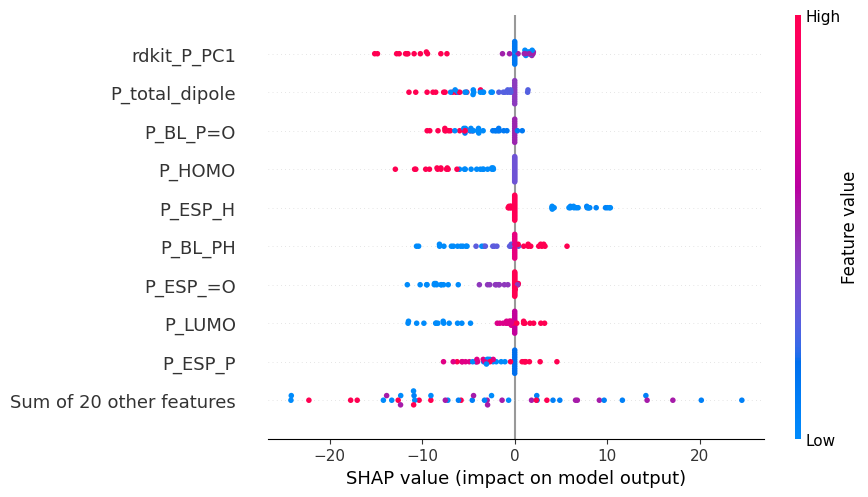

In [8]:
import shap
# explain all the predictions in the test set
def f(x):
    return reg_best.predict(x)


med = a_X_train.median().values.reshape((1, a_X_train.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(a_X_train)
shap.plots.beeswarm(shap_values)

In [9]:
seed=6
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    
#autoscaling
a_X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0, ddof=1)
a_X_test = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0, ddof=1)
    
param_knn={'n_neighbors':[1,2,3,4,5,6,7,8,9,10], 'p':[1,2,3,4,5]}
reg_knn = GridSearchCV(KNeighborsRegressor(), param_grid=param_knn, cv=5, n_jobs=2)
reg_knn.fit(a_X_train,y_train['Yield'])
reg_best = reg_knn.best_estimator_
y_pred1 = reg_best.predict(a_X_train)
y_pred2 = reg_best.predict(a_X_test)

    
#train
r2_train = metrics.r2_score(y_train, y_pred1)
RMSE_train = metrics.mean_squared_error(y_train, y_pred1)
MAE_train =  metrics.mean_absolute_error(y_train, y_pred1)
#test
r2_test = metrics.r2_score(y_test, y_pred2)
RMSE_test = metrics.mean_squared_error(y_test, y_pred2)
MAE_test = metrics.mean_absolute_error(y_test, y_pred2)
print(r2_test)

0.7430538545313401


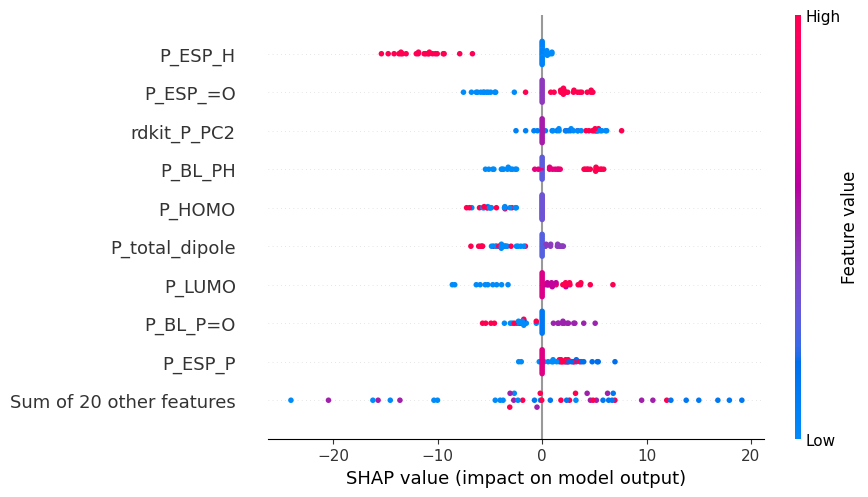

In [10]:
import shap
# explain all the predictions in the test set
def f(x):
    return reg_best.predict(x)


med = a_X_train.median().values.reshape((1, a_X_train.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(a_X_train)
shap.plots.beeswarm(shap_values)